<a href="https://colab.research.google.com/github/shubhampandey78/Public-Service-Demand-Forecasting/blob/main/MPR_SEM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("PMC Hospital Infrastructure.csv")  # Change filename accordingly
df.head()


,City Name,Zone Name,Ward Name,Zone No.,Ward No.,Facility Name,Type (Hospital / Nursing Home / Lab),Class : (Public / Private),Pharmacy Available : Yes/No,Number of Beds in Emergency Wards,Number of Beds in facility type,Number of Doctors / Physicians,Number of Nurses,Number of Midwives Professional,Average Monthly Patient Footfall,Ambulance Service Available,Count of Ambulance
0,Pune,kasba - vishrambagwada WO,Ambil Odha,5.0,NaN,"Late Matoshri Ramabai Ambedkar Maternity Home,...",Hospital (Maternity Home),Public,Yes,0,10,2,4,1,4500,Yes,1
1,Pune,Aundh - Baner WO,Aundh,2.0,NaN,"Aundh Kuti Maternity Home, Aundh",Hospital (Maternity Home),Public,Yes,0,14,2,5,2,2500,Yes,1
2,Pune,Aundh - Baner WO,Bopodi,2.0,NaN,Late Draupadabai Murlidhar Khedekar Maternity ...,Hospital (Maternity Home),Public,Yes,0,16,2,4,9,1900,Yes,1
3,Pune,Ghole Road - Shivaji Nagar WO,Shivaji Nagar Station,2.0,NaN,"Dr. Dalvi, PMC Joint Project",Hospital (Maternity Home),Public,Yes,0,30,4,7,9,2400,Yes,2
4,Pune,Hadapsar - Mundhwa WO,Hadapsar,4.0,NaN,"Late Anna Saheb Magar Maternity Home, Hadapsar",Hospital (Maternity Home),Public,Yes,0,20,2,3,6,4500,Yes,1


In [2]:
# Check shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column data types
print(f"\nColumn Data Types:\n{df.dtypes}")

# Check missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset contains 737 rows and 17 columns.

Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Ward No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
 Class : (Public / Private)               object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards         object
Number of Beds in facility type            int64
Number of Doctors / Physicians            object
Number of Nurses                          object
Number of Midwives Professional           object
Average Monthly Patient Footfall          object
Ambulance Service Available               object
Count of Ambulance                        object
dtype: object

Missing Values:
City Name                                  0
Zone Name                    

# **Data Cleaning**


In [3]:
# Drop 'Ward No.' column since it has all missing values
df.drop(columns=['Ward No.'], inplace=True)

In [4]:
# Convert 'N.A.' and other non-numeric values to NaN
df['Average Monthly Patient Footfall'] = pd.to_numeric(df['Average Monthly Patient Footfall'], errors='coerce')

In [5]:
# Fill missing values using direct assignment
df.loc[:, 'Zone Name'] = df['Zone Name'].fillna(df['Zone Name'].mode()[0])  # Fill with most frequent value
df.loc[:, 'Zone No.'] = df['Zone No.'].fillna(df['Zone No.'].median())  # Fill with median value
df.loc[:, 'Ward Name'] = df['Ward Name'].fillna(df['Ward Name'].mode()[0])
df.loc[:, 'Average Monthly Patient Footfall'] = df['Average Monthly Patient Footfall'].fillna(df['Average Monthly Patient Footfall'].median())

In [6]:
# Convert numerical columns from object to int/float
df.loc[:, 'Number of Doctors / Physicians'] = pd.to_numeric(df['Number of Doctors / Physicians'], errors='coerce')
df.loc[:, 'Number of Nurses'] = pd.to_numeric(df['Number of Nurses'], errors='coerce')
df.loc[:, 'Number of Midwives Professional '] = pd.to_numeric(df['Number of Midwives Professional '], errors='coerce')
df.loc[:, 'Average Monthly Patient Footfall'] = pd.to_numeric(df['Average Monthly Patient Footfall'], errors='coerce')

In [7]:
# Rename columns to remove extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

In [8]:
# Recheck missing values after transformations
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
City Name                                  0
Zone Name                                  0
Ward Name                                  0
Zone No.                                   0
Facility Name                              0
Type  (Hospital / Nursing Home / Lab)      0
Class : (Public / Private)                 0
Pharmacy Available : Yes/No                0
Number of Beds in Emergency Wards          0
Number of Beds in facility type            0
Number of Doctors / Physicians           663
Number of Nurses                         663
Number of Midwives Professional          663
Average Monthly Patient Footfall           0
Ambulance Service Available                0
Count of Ambulance                         0
dtype: int64


In [9]:
df.dropna(subset=['Number of Doctors / Physicians', 'Number of Nurses', 'Number of Midwives Professional'], inplace=True)

In [10]:
print(df.columns)


Index(['City Name', 'Zone Name', 'Ward Name', 'Zone No.', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Number of Beds in Emergency Wards',
       'Number of Beds in facility type', 'Number of Doctors / Physicians',
       'Number of Nurses', 'Number of Midwives Professional',
       'Average Monthly Patient Footfall', 'Ambulance Service Available',
       'Count of Ambulance'],
      dtype='object')


In [11]:
df['Number of Midwives Professional'] = pd.to_numeric(df.get('Number of Midwives Professional'), errors='coerce')


In [12]:
# Recheck missing values after transformations
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
City Name                                0
Zone Name                                0
Ward Name                                0
Zone No.                                 0
Facility Name                            0
Type  (Hospital / Nursing Home / Lab)    0
Class : (Public / Private)               0
Pharmacy Available : Yes/No              0
Number of Beds in Emergency Wards        0
Number of Beds in facility type          0
Number of Doctors / Physicians           0
Number of Nurses                         0
Number of Midwives Professional          0
Average Monthly Patient Footfall         0
Ambulance Service Available              0
Count of Ambulance                       0
dtype: int64


In [13]:
# Check final column data types
print("\nUpdated Column Data Types:")
print(df.dtypes)


Updated Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards         object
Number of Beds in facility type            int64
Number of Doctors / Physicians            object
Number of Nurses                          object
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                        object
dtype: object


In [14]:
# Convert numerical columns from object to int/float
numeric_columns = [
    'Number of Beds in Emergency Wards',
    'Number of Doctors / Physicians',
    'Number of Nurses',
    'Number of Midwives Professional',
    'Average Monthly Patient Footfall',
    'Count of Ambulance'
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()  # Remove extra spaces
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Check final column data types again
print("\nUpdated Column Data Types:")
print(df.dtypes)



Updated Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards          int64
Number of Beds in facility type            int64
Number of Doctors / Physicians           float64
Number of Nurses                         float64
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                         int64
dtype: object


In [15]:
# Check columns that are still of object data type
object_columns = df.select_dtypes(include=['object']).columns
print("\nColumns still of object type:")
print(object_columns)



Columns still of object type:
Index(['City Name', 'Zone Name', 'Ward Name', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Ambulance Service Available'],
      dtype='object')


In [16]:
# Check the first few rows of each column with object data type
for col in object_columns:
    print(f"\nInspecting column: {col}")
    print(df[col].unique())  # Inspect unique values for odd characters or patterns



Inspecting column: City Name
['Pune']

Inspecting column: Zone Name
['kasba - vishrambagwada WO' 'Aundh - Baner WO'
 'Ghole Road - Shivaji Nagar WO' 'Hadapsar - Mundhwa WO'
 'Kothrud - Bavdhan WO' 'Bhawani Peth WO' 'Wanowrie - Ramtekdi WO'
 'Sangamwadi WO' 'Kondhwa - Yewlewadi WO' 'Dhole Patil Road WO'
 'Warje - Karve Nagar WO' 'Sinhagad Road WO' '2'
 'Sahakar Nagar - Dhankawadi WO']

Inspecting column: Ward Name
['Ambil Odha' 'Aundh' 'Bopodi' 'Shivaji Nagar Station' 'Hadapsar'
 'Health Camp' 'Gujrath Colony, Kothrud' 'Mundhwa' 'Pashan Gaon'
 'Bhawani Peth' 'Wanowrie' 'Yerawada' 'Guruwar Peth' 'Kondhwa'
 'Gadikhana, Shukruwar Peth' 'Mitramandal' 'Balaji Nagar'
 'Maharashtra Housing Board, Yerawada' 'Somwar Peth' 'Pune Station'
 'Erandwane' 'Dattawadi' 'Ganjpeth' 'Hingne' 'Mangalwar Peth'
 'Narayan Peth' 'Nana Peth' 'Ravivar Peth' 'Vishrantwadi' 'Sahakar Nagar'
 'Shaniwar Peth' 'PMC Bhavan, Shivaji Nagar' 'Aundh Road' 'Ganesh Peth'
 'Kalyani Nagar' 'Lohagaon' 'Maharshi Nagar, Gultekdi'

In [17]:
# Verify columns before dropping
columns_to_drop = ['City Name','Zone Name', 'Ward Name', 'Facility Name']
missing_columns = [col for col in columns_to_drop if col not in df.columns]

if not missing_columns:
    # Drop the columns if they exist
    df = df.drop(columns=columns_to_drop)
else:
    print(f"These columns are missing from the DataFrame: {missing_columns}")


We have dropped 3 colums - ZONE NAME , WARD NAME ,FACILITY NAME

In [18]:
# Check final column data types again
print("\nUpdated Column Data Types:")
print(df.dtypes)


Updated Column Data Types:
Zone No.                                 float64
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards          int64
Number of Beds in facility type            int64
Number of Doctors / Physicians           float64
Number of Nurses                         float64
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                         int64
dtype: object


REST OF THE COLUMNS WHICH ARE STILL OF OBJECT Data Type will apply encoding of different type on them

In [19]:
print("Columns in dataset:\n", df.columns)
print("\nMissing values after cleaning:\n",df.isnull().sum())


Columns in dataset:
 Index(['Zone No.', 'Type  (Hospital / Nursing Home / Lab)',
       'Class : (Public / Private)', 'Pharmacy Available : Yes/No',
       'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional', 'Average Monthly Patient Footfall',
       'Ambulance Service Available', 'Count of Ambulance'],
      dtype='object')

Missing values after cleaning:
 Zone No.                                 0
Type  (Hospital / Nursing Home / Lab)    0
Class : (Public / Private)               0
Pharmacy Available : Yes/No              0
Number of Beds in Emergency Wards        0
Number of Beds in facility type          0
Number of Doctors / Physicians           0
Number of Nurses                         0
Number of Midwives Professional          0
Average Monthly Patient Footfall         0
Ambulance Service Available              0
Count of Ambulance                       0
d

In [20]:
# Filling missing numerical values with median
numerical_cols = [
    'Number of Beds in Emergency Wards',
    'Number of Doctors / Physicians',
    'Number of Nurses',
    'Number of Midwives Professional',
    'Count of Ambulance'
]

for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())  # Safe assignment without warning

# Check missing values again
print("\nMissing values after filling:\n", df.isnull().sum())



Missing values after filling:
 Zone No.                                 0
Type  (Hospital / Nursing Home / Lab)    0
Class : (Public / Private)               0
Pharmacy Available : Yes/No              0
Number of Beds in Emergency Wards        0
Number of Beds in facility type          0
Number of Doctors / Physicians           0
Number of Nurses                         0
Number of Midwives Professional          0
Average Monthly Patient Footfall         0
Ambulance Service Available              0
Count of Ambulance                       0
dtype: int64


In [21]:
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure they are numeric


In [22]:
df.to_csv("cleaned_data.csv", index=False)


## **EDA ANALYSIS**


In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [33]:
# Display summary statistics
print(df.describe())


        Zone No.  Number of Beds in Emergency Wards  \
count  74.000000                               74.0   
mean    3.189189                                0.0   
std     0.931572                                0.0   
min     1.000000                                0.0   
25%     3.000000                                0.0   
50%     3.000000                                0.0   
75%     3.000000                                0.0   
max     5.000000                                0.0   

       Number of Beds in facility type  Number of Doctors / Physicians  \
count                        74.000000                       74.000000   
mean                         15.621622                        1.567568   
std                          60.631992                        1.345526   
min                           0.000000                        1.000000   
25%                           0.000000                        1.000000   
50%                           0.000000                      

In [34]:
# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
Zone No.                                 0
Type  (Hospital / Nursing Home / Lab)    0
Class : (Public / Private)               0
Pharmacy Available : Yes/No              0
Number of Beds in Emergency Wards        0
Number of Beds in facility type          0
Number of Doctors / Physicians           0
Number of Nurses                         0
Number of Midwives Professional          0
Average Monthly Patient Footfall         0
Ambulance Service Available              0
Count of Ambulance                       0
dtype: int64


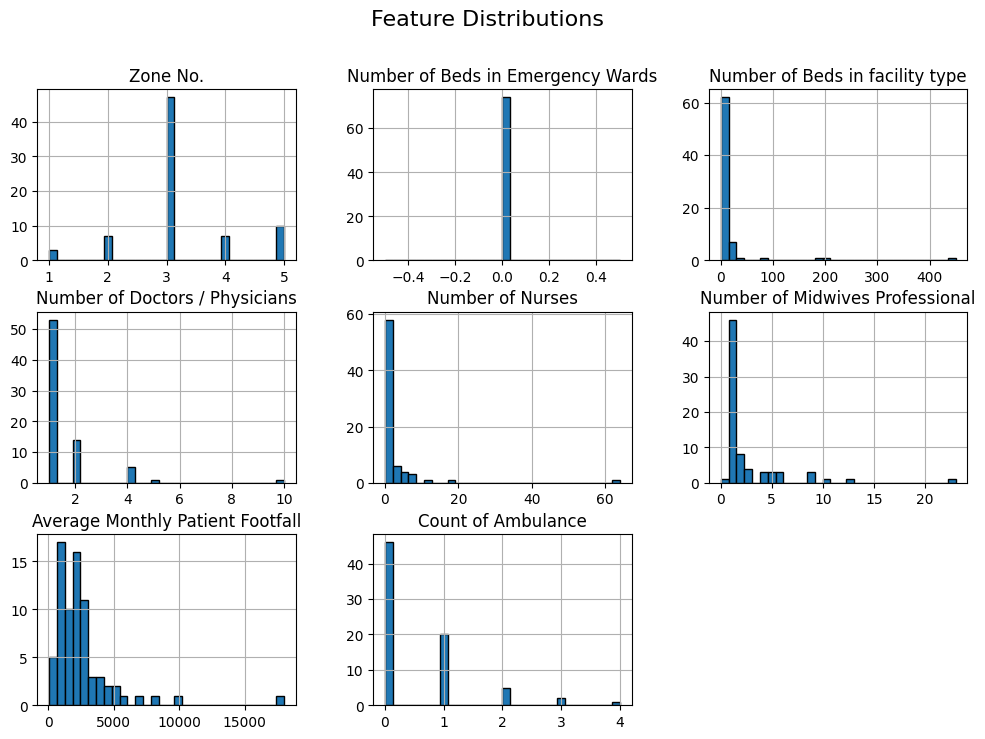

In [35]:
# Plot distributions of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


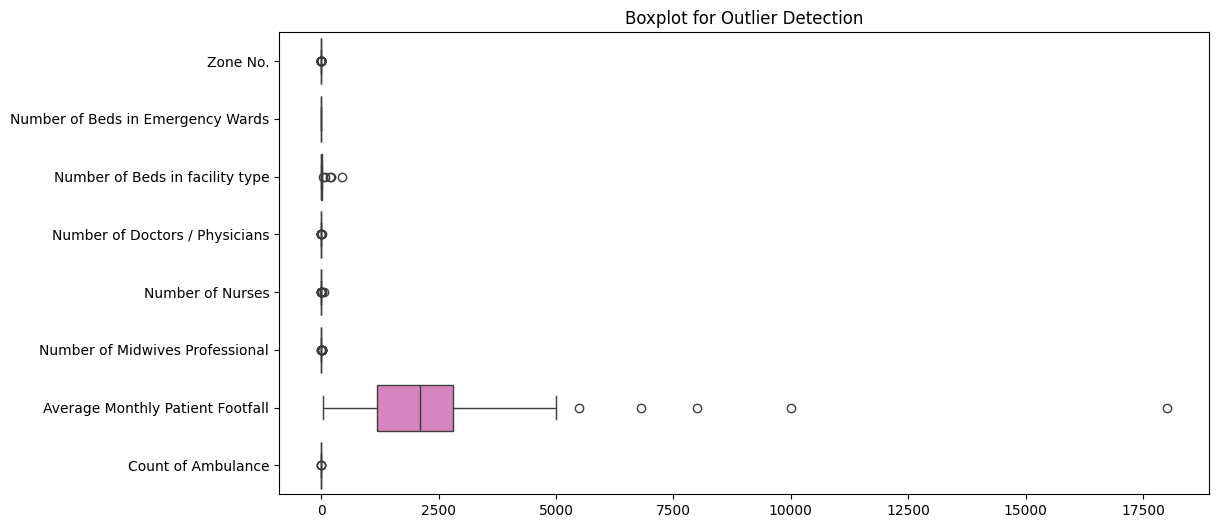

In [36]:
# Cell 5: Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()


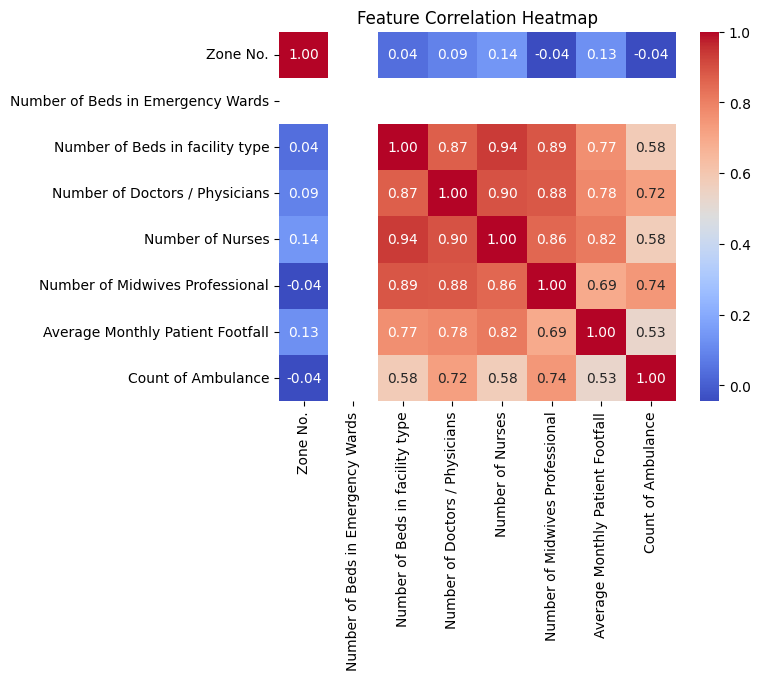

In [37]:
# Cell 6: Correlation heatmap for numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-38-4f41d1c2ee71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


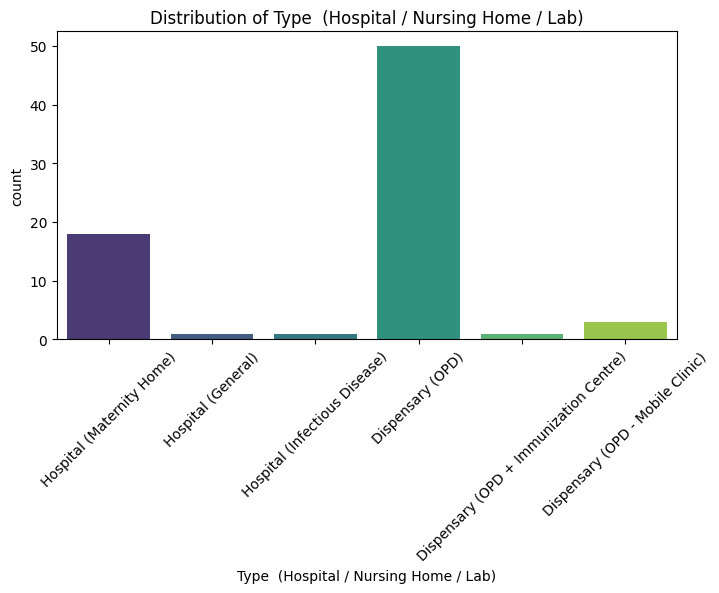

<ipython-input-38-4f41d1c2ee71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


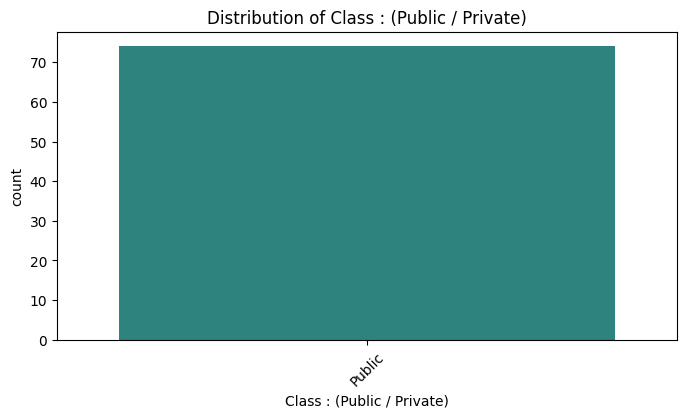

<ipython-input-38-4f41d1c2ee71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


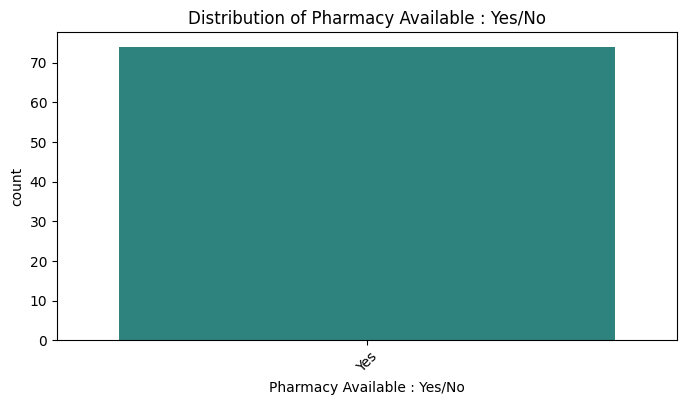

<ipython-input-38-4f41d1c2ee71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


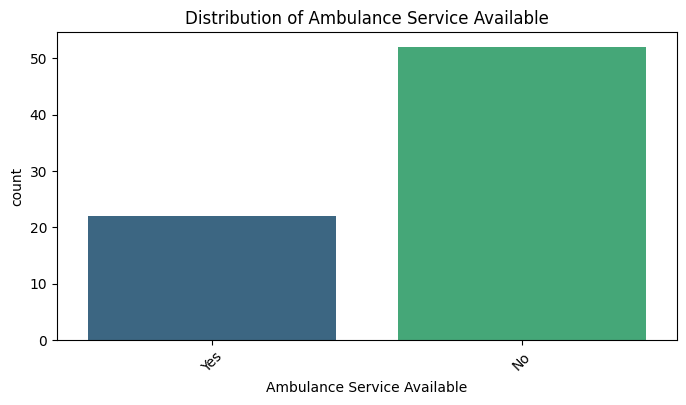

In [38]:
# Cell 7: Countplot for categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


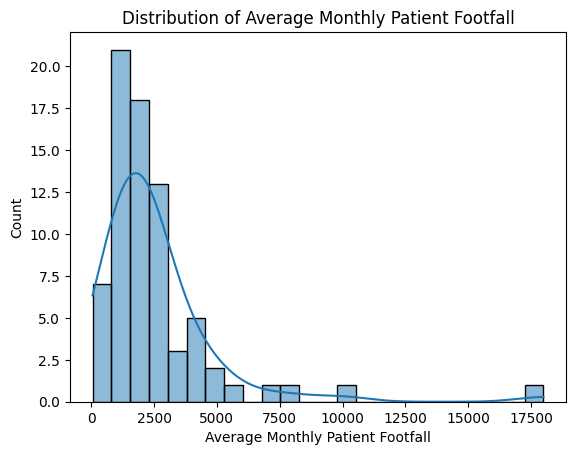

In [39]:
# Cell 8: Check the distribution of the target variable (if it's numerical)
sns.histplot(df['Average Monthly Patient Footfall'], kde=True)
plt.title('Distribution of Average Monthly Patient Footfall')
plt.show()


In [40]:
df = pd.read_csv("cleaned_data.csv")  # If you saved it after cleaning but before encoding


# **DATA PRE-PROCESSING**

Handling Categorical Variables

In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [42]:
# Drop the City Name column (if not already dropped)
df = df.drop(columns=['City Name'], errors='ignore')


In [43]:
# Identify categorical columns (excluding the ones you dropped earlier)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Ambulance Service Available'],
      dtype='object')


In [44]:
# One-Hot Encoding for columns with more than 2 categories
one_hot_cols = ['Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)']  # You can add other multi-category columns here

In [45]:
# Apply One-Hot Encoding using pandas' get_dummies (removes the first category to avoid multicollinearity)
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [46]:
# Label Encoding for binary categorical columns
binary_cols = ['Pharmacy Available : Yes/No', 'Ambulance Service Available']

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert 'Yes'/'No' to 1/0
    label_encoders[col] = le  # Store the encoder for future use

In [47]:
print("\nDataset after encoding:")
print(df.head())


Dataset after encoding:
   Zone No.  Pharmacy Available : Yes/No  Number of Beds in Emergency Wards  \
0       5.0                            0                                  0   
1       2.0                            0                                  0   
2       2.0                            0                                  0   
3       2.0                            0                                  0   
4       4.0                            0                                  0   

   Number of Beds in facility type  Number of Doctors / Physicians  \
0                               10                             2.0   
1                               14                             2.0   
2                               16                             2.0   
3                               30                             4.0   
4                               20                             2.0   

   Number of Nurses  Number of Midwives Professional  \
0               4.0    

In [48]:
# Convert True/False to 1/0 for the One-Hot Encoded columns
one_hot_encoded_cols = [col for col in df.columns if 'Type  (Hospital / Nursing Home / Lab)' in col]

for col in one_hot_encoded_cols:
    df[col] = df[col].astype(int)

# Check the DataFrame again
print(df.head())


   Zone No.  Pharmacy Available : Yes/No  Number of Beds in Emergency Wards  \
0       5.0                            0                                  0   
1       2.0                            0                                  0   
2       2.0                            0                                  0   
3       2.0                            0                                  0   
4       4.0                            0                                  0   

   Number of Beds in facility type  Number of Doctors / Physicians  \
0                               10                             2.0   
1                               14                             2.0   
2                               16                             2.0   
3                               30                             4.0   
4                               20                             2.0   

   Number of Nurses  Number of Midwives Professional  \
0               4.0                             

In [49]:
# Show all column names, first few rows, and data types
print(df.columns)  # Show all column names
print(df.head())   # Show first few rows of the dataset
print(df.dtypes)   # Check data types of each column

Index(['Zone No.', 'Pharmacy Available : Yes/No',
       'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional', 'Average Monthly Patient Footfall',
       'Ambulance Service Available', 'Count of Ambulance',
       'Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD - Mobile Clinic)',
       'Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (General)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (Infectious Disease)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (Maternity Home)'],
      dtype='object')
   Zone No.  Pharmacy Available : Yes/No  Number of Beds in Emergency Wards  \
0       5.0                            0                                  0   
1       2.0                            0                                  0   
2       2.0                            0       

In [50]:
# Feature Scaling for numerical columns
scaler = StandardScaler()

In [51]:
# Select numerical columns for scaling
num_cols = [
    'Zone No.', 'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
    'Number of Doctors / Physicians', 'Number of Nurses', 'Number of Midwives Professional',
    'Count of Ambulance', 'Average Monthly Patient Footfall'
]

df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature scaling done ✅")

Feature scaling done ✅


Since we have numerical features like Number of Beds, Doctors, etc., we should apply Min-Max Scaling or Standardization.


# **Train-Test Split**

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Average Monthly Patient Footfall'])  # Features
y = df['Average Monthly Patient Footfall']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Done ✅")
print("Training Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train-Test Split Done ✅
Training Set: (59, 14) (59,)
Test Set: (15, 14) (15,)


# **Implement MLR in TensorFlow**

In [53]:
#Import Required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


In [54]:
print(X_train.columns)
print(X_test.columns)


Index(['Zone No.', 'Pharmacy Available : Yes/No',
       'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional', 'Ambulance Service Available',
       'Count of Ambulance',
       'Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD - Mobile Clinic)',
       'Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (General)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (Infectious Disease)',
       'Type  (Hospital / Nursing Home / Lab)_Hospital (Maternity Home)'],
      dtype='object')
Index(['Zone No.', 'Pharmacy Available : Yes/No',
       'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional', 'Ambulance Service Available',
       'Count of Ambulance',
       'Type  (Hospital / Nu

In [55]:
# Drop unnecessary columns (if any) from X_train and X_test (e.g., City Name, Facility Name, Ward Name)
cols_to_drop = ['City Name', 'Facility Name', 'Ward Name']  # Already removed earlier
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

In [56]:
# Ensure no non-numeric columns remain
print(X_train.dtypes)  # Check if any non-numeric columns remain

Zone No.                                                                  float64
Pharmacy Available : Yes/No                                                 int64
Number of Beds in Emergency Wards                                         float64
Number of Beds in facility type                                           float64
Number of Doctors / Physicians                                            float64
Number of Nurses                                                          float64
Number of Midwives Professional                                           float64
Ambulance Service Available                                                 int64
Count of Ambulance                                                        float64
Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD - Mobile Clinic)      int64
Type  (Hospital / Nursing Home / Lab)_Dispensary (OPD)                      int64
Type  (Hospital / Nursing Home / Lab)_Hospital (General)                    int64
Type  (Hospital 

In [57]:
# Convert data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [58]:
# Define a Linear Regression model (Multiple Linear Regression)
model = keras.Sequential([
    layers.Dense(units=1, input_shape=(X_train.shape[1],))  # Single layer with no activation, i.e., linear regression
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Compile the model (using Mean Squared Error for loss, as it is a regression task)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [60]:
# Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=100, validation_data=(X_test_tensor, y_test_tensor))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.8664 - mae: 0.7757 - val_loss: 3.4464 - val_mae: 1.1961
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.9437 - mae: 0.8210 - val_loss: 3.3988 - val_mae: 1.1884
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.8761 - mae: 0.7732 - val_loss: 3.3531 - val_mae: 1.1809
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.8700 - mae: 0.7748 - val_loss: 3.3084 - val_mae: 1.1735
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.7898 - mae: 0.7558 - val_loss: 3.2643 - val_mae: 1.1662
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.7914 - mae: 0.7434 - val_loss: 3.2198 - val_mae: 1.1588
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.7647 - mae: 0.7402 - val_loss: 3.1752 - val_mae: 1.1513
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7939 - mae: 0.7499 - val_loss: 3.1302 - val_mae: 1.1437
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.6970 - mae

In [61]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_tensor, y_test_tensor)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.0878 - mae: 0.7268
Test Loss (MSE): 1.0877995491027832, Test MAE: 0.7268345355987549


In [62]:
# Make predictions
y_pred = model.predict(X_test_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [65]:
# Convert predictions to 1D arrays for metric calculations
y_pred_flat = y_pred.flatten()
y_test_flat = y_test_tensor.numpy().flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R2 Score
r2 = r2_score(y_test_flat, y_pred_flat)
print("R² Score:", r2)

# Custom Accuracy: Percentage of predictions within 10% of actual values
custom_accuracy = np.mean(np.abs((y_test_flat - y_pred_flat) / y_test_flat))
print("Custom Accuracy within 10% tolerance:", custom_accuracy * 100, "%")


Root Mean Squared Error (RMSE): 1.0429762364951052
R² Score: 0.6520200967788696
Custom Accuracy within 10% tolerance: 75.0559 %


In [66]:
model.save('model.h5')


# New section

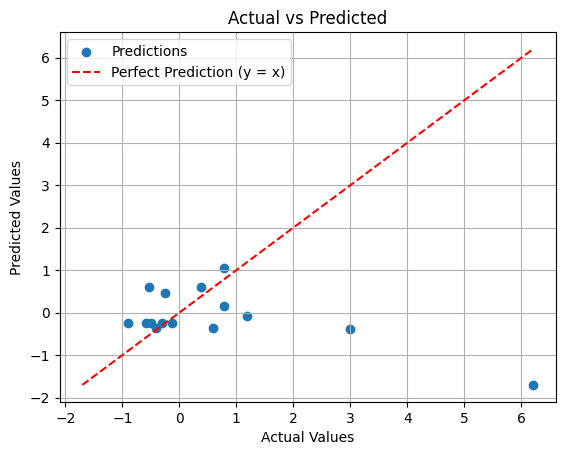

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Add line y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction (y = x)')

plt.legend()
plt.grid(True)
plt.show()

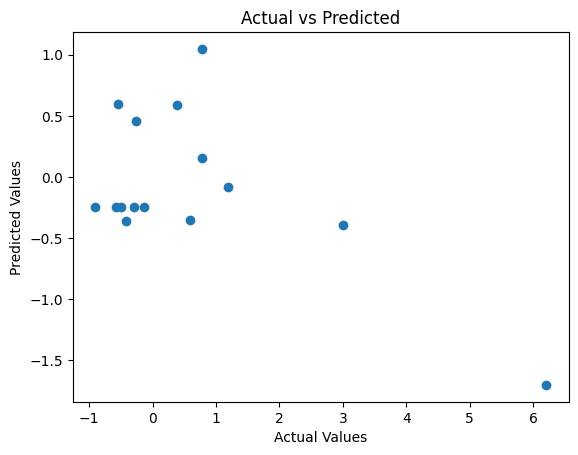

In [ ]:
# Compare predictions with actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()